In [11]:
import argparse
import yaml
import numpy as np
import pickle as pkl
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from itertools import product
from datetime import datetime
import json
import hashlib
import os
from algorithms import BMP
from data_generation import *


In [14]:
np.matrix(np.arange(600*100).reshape(600, 100))

matrix([[    0,     1,     2, ...,    97,    98,    99],
        [  100,   101,   102, ...,   197,   198,   199],
        [  200,   201,   202, ...,   297,   298,   299],
        ...,
        [59700, 59701, 59702, ..., 59797, 59798, 59799],
        [59800, 59801, 59802, ..., 59897, 59898, 59899],
        [59900, 59901, 59902, ..., 59997, 59998, 59999]])

In [17]:
np.matrix(np.arange(600*100).reshape(600, 100)).tofile('test.dat')

In [16]:
# dump the matrix to a file
with open('test_matrix.npy', 'wb') as f:
    np.save(f, np.matrix(np.arange(600*100).reshape(600, 100)))

In [3]:
p = 300
n = 500
m = 20
trial_id = 1
noise_level = 0.1

Data_Geneartor = GaussianDataGenerator(p, n, m, noise_level, trial_id)
(
    true_signal,
    dictionary,
    true_indices,
    true_coefficients,
    perturbed_signal,
) = Data_Geneartor.shuffle()
X_train, X_test, y_train, y_test = train_test_split(
    dictionary, perturbed_signal, test_size=0.2, random_state=trial_id
)

In [13]:
bmp_model = BMP(N_bag= 10, K = 10, signal_bag_percent= 0.5, atom_bag_percent= 0.4, replace_flag=False, random_seed=0) 

In [14]:
bmp_model.fit(X_train, y_train)

Tmp Pursuit Model indices:  [35, 289, 93, 86, 37, 273, 208, 138, 177, 222]
Tmp Pursuit Model indices:  [35, 93, 37, 273, 82, 208, 222, 86, 123, 121]
Tmp Pursuit Model indices:  [93, 35, 273, 37, 208, 86, 177, 222, 123, 83]
Tmp Pursuit Model indices:  [93, 37, 177, 35, 207, 86, 273, 208, 123, 37]
Tmp Pursuit Model indices:  [35, 208, 177, 135, 273, 37, 93, 86, 123, 197]
Tmp Pursuit Model indices:  [177, 273, 35, 208, 86, 93, 68, 289, 135, 264]
Tmp Pursuit Model indices:  [208, 35, 217, 93, 177, 86, 273, 264, 37, 222]
Tmp Pursuit Model indices:  [35, 93, 37, 86, 266, 292, 208, 273, 177, 13]
Tmp Pursuit Model indices:  [35, 177, 93, 86, 273, 254, 123, 208, 222, 110]
Tmp Pursuit Model indices:  [37, 35, 93, 208, 273, 86, 222, 13, 177, 108]


In [8]:
bmp_model.coefficients.shape

(300,)

In [6]:
from algorithms import SignalBagging
signal_atom_bagging = SignalBagging(10, 0.5, False, 0)
signal_atom_bagging.fit(X_train, y_train)

([array([[ 2.75150065e-01],
         [ 1.99597872e-01],
         [-1.21173255e-01],
         [-2.04088710e-01],
         [-6.12719560e-02],
         [-2.21945380e-01],
         [-5.03597178e-01],
         [-2.13609967e-01],
         [-3.67499725e-01],
         [ 4.61330471e-02],
         [-4.85253396e-02],
         [ 1.28363090e-01],
         [ 7.38231094e-03],
         [-1.09481764e-01],
         [-2.70597438e-01],
         [-3.93453957e-01],
         [-8.46285478e-02],
         [-1.46391551e-01],
         [ 4.78705508e-02],
         [-2.57261700e-01],
         [ 1.40803677e-02],
         [ 5.06266910e-01],
         [ 2.28340409e-01],
         [-7.62017927e-02],
         [-5.70042589e-02],
         [-3.14529383e-01],
         [ 1.09262783e-02],
         [ 2.01109344e-01],
         [ 4.32072058e-02],
         [-3.16059603e-02],
         [ 1.75830978e-01],
         [ 1.27747153e-01],
         [-7.13745976e-02],
         [-2.19261459e-01],
         [ 1.03817364e-01],
         [ 3.9703333

In [7]:
y_train.shape

(400, 1)

In [8]:
s_bag = signal_atom_bagging.s_bag
phi_bag = signal_atom_bagging.phi_bag

In [9]:
s_bag[0].shape, phi_bag[0].shape

((200, 1), (200, 300))

In [10]:
s_bag[1].shape, phi_bag[1].shape

((200, 1), (200, 300))

In [11]:
from algorithms import AtomBaggingMatchingPursuit

abmp = AtomBaggingMatchingPursuit(10, 0.5, False, None)
abmp.fit(X_train, y_train)
abmp.indices

[177, 35, 93, 208, 86, 123, 273, 222, 37, 197]

In [12]:
coef = abmp.coefficients
coef.shape

(300,)

In [17]:
np.mean(X_train @ coef)

0.007936392248095232

In [18]:
np.mean(X_train @ abmp.coefficients.reshape(-1, 1))

0.007936392248095232

<AxesSubplot: ylabel='Count'>

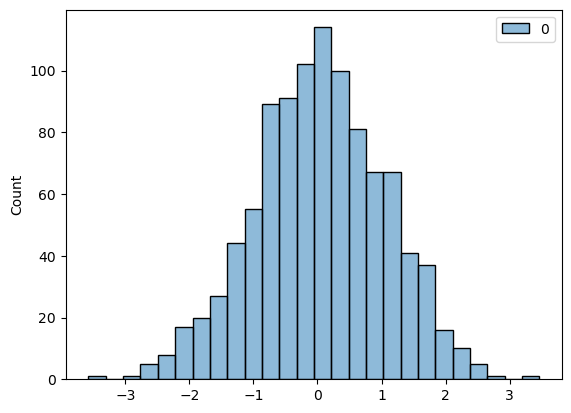

In [15]:
p = 1000
phi = np.random.normal(0, 1, (p, 1))
import seaborn as sns
sns.histplot(phi)

In [16]:
phi_norm = phi / np.linalg.norm(phi)

percent = 0.8
random_ind = np.random.choice(p, int(p * percent), replace=False)

phi_norm_bag = phi_norm[random_ind]

np.linalg.norm(phi_norm_bag)

0.8969295232816775

In [17]:
s = phi_norm * 2 + np.random.normal(0, 0.01, (p, 1))
s_bag = s[random_ind]

In [18]:
np.dot(phi_norm.T, s)

array([[2.00548743]])

In [19]:
np.dot(phi_norm_bag.T, s_bag)

array([[1.61530919]])

In [20]:
np.dot(phi_norm_bag.T, s_bag) / np.linalg.norm(phi_norm_bag)**2

array([[2.00788588]])

In [6]:


split = np.split(y_train, 5)

In [7]:
y_train.shape

(400, 1)

In [10]:
split[1].shape

(80, 1)